<a href="https://www.kaggle.com/code/therealoise/web-scraping-cryptocurrency-historical-data?scriptVersionId=108290241" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

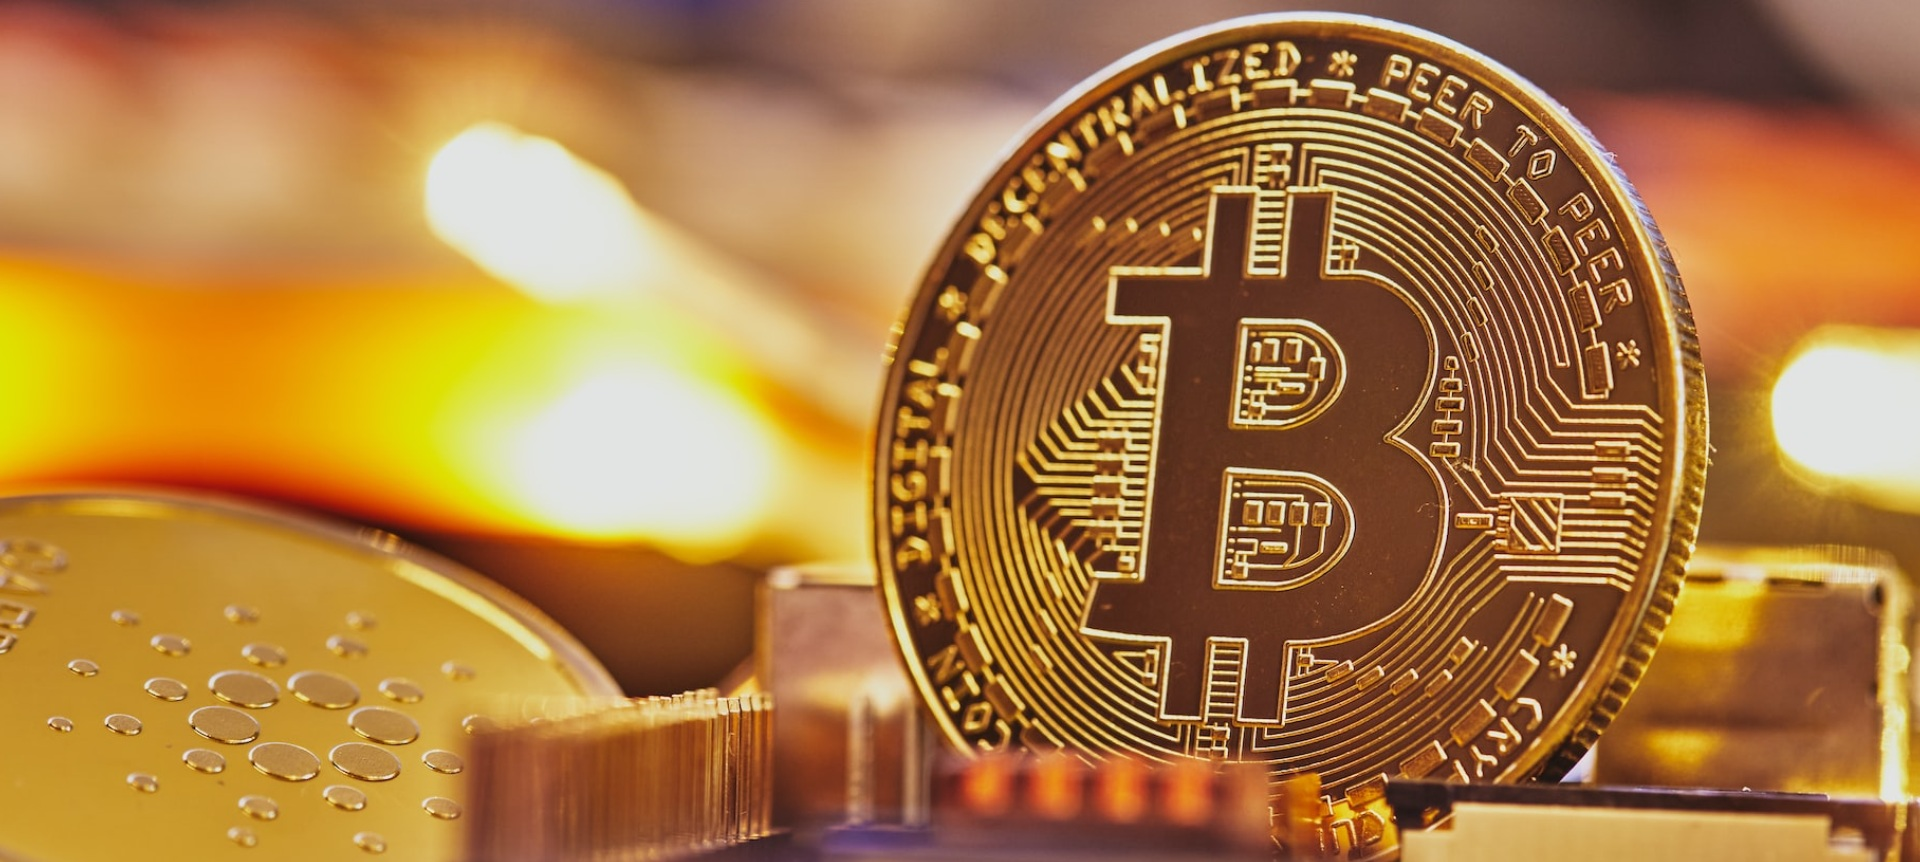
Photo by <a href="https://unsplash.com/@michael_f?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Michael Förtsch</a> on <a href="https://unsplash.com/s/photos/cryptocurrency?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

I'm currently working on a couple of projects where I am analyzing different cryptocurrencies. Just thought I should share a simple function I used to grab some data from **yahoofinance**. You can tweak the parameters to suit the timeframe you need for your project.

In [1]:
from datetime import datetime
import time
import pandas as pd

In [2]:
def create_download_url(
    ticker,
    period1,
    period2,
    interval='monthly'
):
    """
    Date format for period 1 and 2= 'yyyy-mm-dd'
    The interval: {daily; weekly, monthly}
    """
    def convert_to_seconds(period):
        datetime_value = datetime.strptime(period, '%Y-%m-%d')
        total_seconds = int(time.mktime(datetime_value.timetuple())) + 86400
        return total_seconds
    try:
        interval_reference = {'daily': '1d', 'weekly': '1wk', 'monthly': '1mo'}
        _interval = interval_reference.get(interval)
        if _interval is None:
            print('interval code is incorrect')
            return
        p1 = convert_to_seconds(period1)
        p2 = convert_to_seconds(period2)
        url = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={p1}&period2={p2}&interval={_interval}&filter=history'
        return url
    except Exception as e:
        print (e)
        return
    
#grab dataset
query_url = create_download_url('BTC-USD', '2020-08-07', '2022-08-07', 'daily')
df = pd.read_csv(query_url)
df.set_index('Date', inplace=True)
    
#Export as csv
df.to_csv("Bitcoin_Historical_Data.csv")

In [3]:
df = pd.read_csv("Bitcoin_Historical_Data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-08,11604.553711,11800.064453,11558.431641,11754.045898,11754.045898,17572057837
1,2020-08-09,11737.325195,11806.056641,11548.784180,11675.739258,11675.739258,17489608833
2,2020-08-10,11662.256836,12045.140625,11662.256836,11878.111328,11878.111328,26114112569
3,2020-08-11,11881.647461,11932.710938,11195.708984,11410.525391,11410.525391,27039782640
4,2020-08-12,11404.596680,11748.396484,11249.605469,11584.934570,11584.934570,25064548486


Find complete dataset here: **[Bitcoin and Ethereum Historical Dataset](https://www.kaggle.com/datasets/therealoise/bitcoin-and-ethereum-historical-dataset)**

If you find this helpful, do consider leaving an upvote.